In [1]:
#Importing Libraries

#data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import plotly.graph_objs as go
#import plotly.tools as tls
#import plotly.offline as py

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import gc
from sklearn import metrics
#import lightgbm as lgb
import time
import datetime

In [2]:
data = pd.read_csv('training_data_with_weather_info_week_1.csv')

In [3]:
data.head()

,Id,Id.1,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,day_from_jan_first,temp,min,max,stp,wdsp,prcp,fog
0,0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,22,42.6,33.6,54.9,999.9,9.4,0.00,0
1,1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,23,42.0,32.7,55.9,999.9,14.9,99.99,1
2,2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,24,40.1,36.9,43.2,999.9,10.4,0.17,1
3,3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,25,46.0,37.9,56.3,999.9,6.1,0.57,1
4,4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,26,42.8,36.1,53.1,999.9,10.8,0.00,1


In [4]:
def exploreFeatures(col):
  top_n=10
  top_n = top_n if data[col].nunique() > top_n else data[col].nunique()
  print(f"{col} has {data[col].nunique()} unique values and type: {data[col].dtype}.")
  print(data[col].value_counts(normalize=True, dropna=False).head())

In [5]:
exploreFeatures('Country/Region')

Country/Region has 163 unique values and type: object.
US           0.204225
China        0.116197
Canada       0.038732
Australia    0.031690
France       0.028169
Name: Country/Region, dtype: float64


So, now We need to check out the country wise confirmed cases and Fatalities

There are 163 different nations in the training dataset.
145 of these nations have confirmed cases of COVID-19.
In 90 of these nations, people have died of COVID-19.


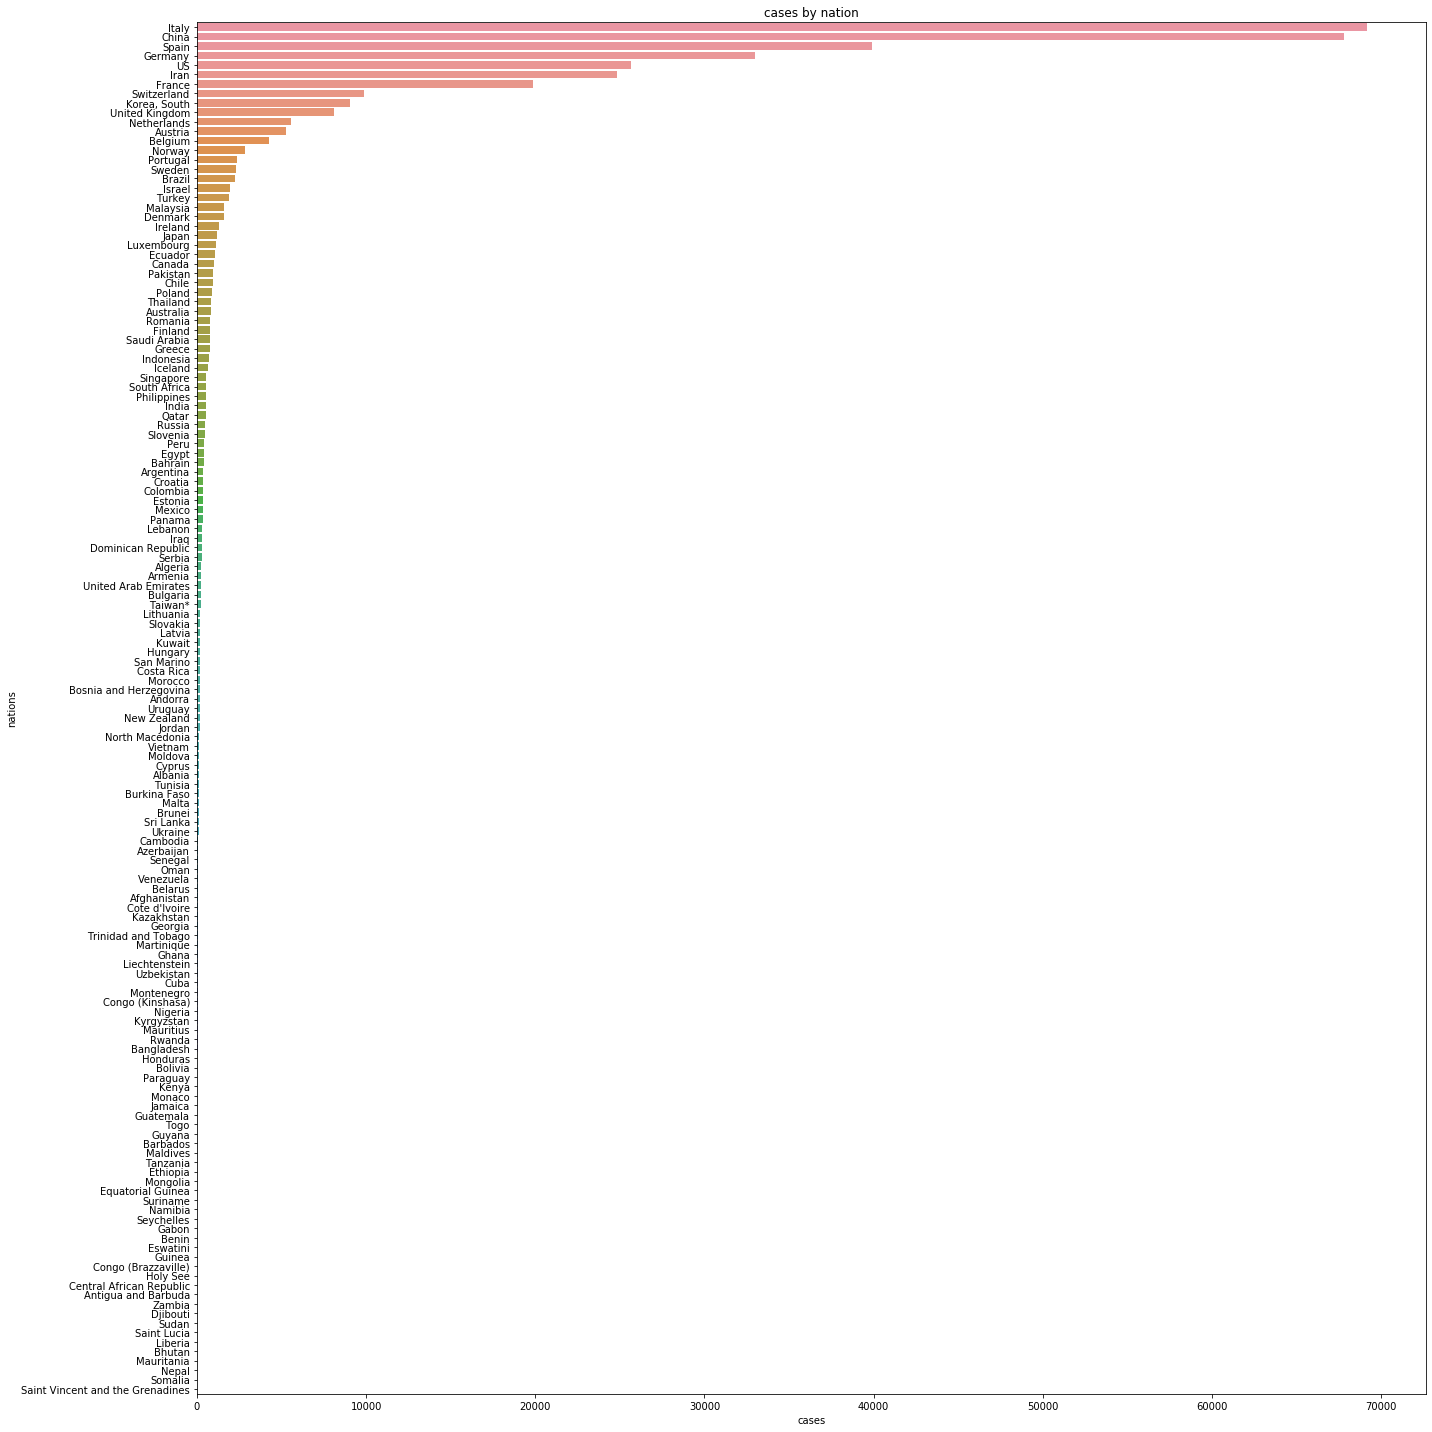

In [6]:
x = len([nation for nation in data['Country/Region'].unique()])
print("There are {} different nations in the training dataset.".format(x))

s = data.groupby('Country/Region').ConfirmedCases.max()
nations_cases = [x for x in s.index if s[x]]
print("{} of these nations have confirmed cases of COVID-19.".format(len(nations_cases)))

s_2 = data.groupby('Country/Region').Fatalities.max()
nations_deaths = [x for x in s_2.index if s_2[x]]
print("In {} of these nations, people have died of COVID-19.".format(len(nations_deaths)))

barplot_df = pd.DataFrame({
    'nations': nations_cases,
    'cases': [s[x] for x in s.index if s[x]]
})
plt.figure(figsize=(20, 20))
sns.barplot(x="cases", y="nations", data=barplot_df.sort_values(by='cases', ascending=False))
plt.title('cases by nation')
plt.tight_layout()
plt.show()

As we can see:

* There are 163 different nations in the training dataset.
* 145 of these nations have confirmed cases of COVID-19.
* In 90 of these nations, people have died of COVID-19.

Italy, China, Germany, US, Spain, France, Iran, Switzerland, South Korea, and UK have most number of confirmed cases.

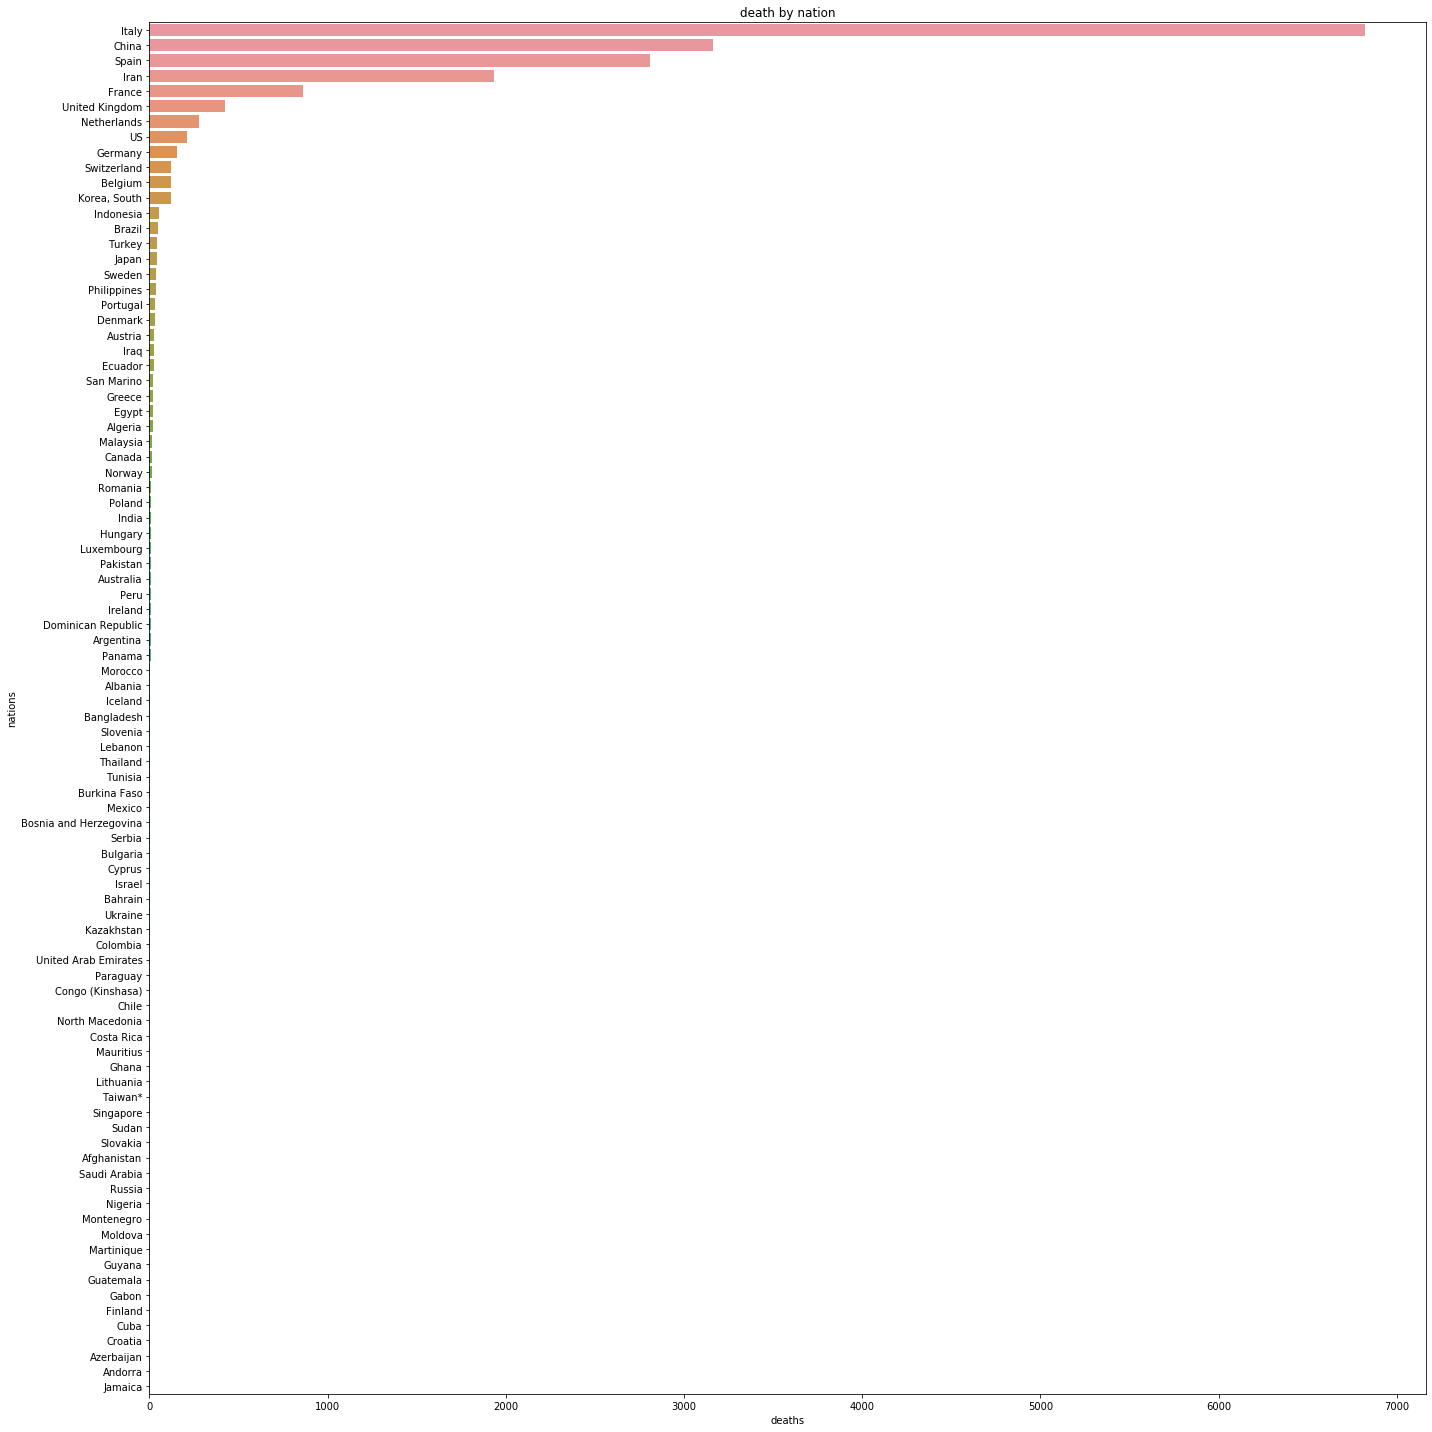

In [7]:
barplot_df = pd.DataFrame({
    'nations': nations_deaths,
    #'Fatalities': [s_2[x] for x in s.index if s_2[x]]
    'deaths': [s_2[x] for x in s_2.index if s_2[x]]
})
plt.figure(figsize=(20, 20))
sns.barplot(x="deaths", y="nations", data=barplot_df.sort_values(by='deaths', ascending=False))
plt.title('death by nation')
plt.tight_layout()
plt.show()




Italy, China, Spain, Iran, France, UK, Netherland, US, germany, Switzerland have most number of Deaths due to Corono Virus.

Problem Statement / We need Answers of:

1) Obsereve when 1st Confirmed Case reported in each country, provide its date, days from jan first.

2) Obsereve Highest no. of Confirmed Case reported in each country, provide its date, days from jan first.

3) Obsereve when 1st Fatality reported in each country, provide its date, days from jan first.

4) Obsereve Highest no. of Fatalities reported in each country, provide its date, days from jan first.

In [8]:
#Italy
confirmed_total_date_Italy = data[data['Country/Region']=='Italy'].groupby(['day_from_jan_first']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Italy = data[data['Country/Region']=='Italy'].groupby(['day_from_jan_first']).agg({'Fatalities':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)

In [9]:
#china
confirmed_total_date_China = data[data['Country/Region']=='China'].groupby(['day_from_jan_first']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_China = data[data['Country/Region']=='China'].groupby(['day_from_jan_first']).agg({'Fatalities':['sum']})
total_date_China = confirmed_total_date_China.join(fatalities_total_date_China)

In [10]:
#Spain
confirmed_total_date_Spain = data[data['Country/Region']=='Spain'].groupby(['day_from_jan_first']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Spain = data[data['Country/Region']=='Spain'].groupby(['day_from_jan_first']).agg({'Fatalities':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(fatalities_total_date_Spain)

In [11]:
#US
confirmed_total_date_US = data[data['Country/Region']=='US'].groupby(['day_from_jan_first']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_US = data[data['Country/Region']=='US'].groupby(['day_from_jan_first']).agg({'Fatalities':['sum']})
total_date_US = confirmed_total_date_US.join(fatalities_total_date_US)

In [12]:
#France
confirmed_total_date_France = data[data['Country/Region']=='France'].groupby(['day_from_jan_first']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_France = data[data['Country/Region']=='France'].groupby(['day_from_jan_first']).agg({'Fatalities':['sum']})
total_date_France = confirmed_total_date_France.join(fatalities_total_date_France)

In [13]:
#Iran
confirmed_total_date_Iran = data[data['Country/Region']=='Iran'].groupby(['day_from_jan_first']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Iran = data[data['Country/Region']=='Iran'].groupby(['day_from_jan_first']).agg({'Fatalities':['sum']})
total_date_Iran = confirmed_total_date_Iran.join(fatalities_total_date_Iran)

In [14]:
#Switzerland
confirmed_total_date_Switzerland = data[data['Country/Region']=='Switzerland'].groupby(['day_from_jan_first']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Switzerland = data[data['Country/Region']=='Switzerland'].groupby(['day_from_jan_first']).agg({'Fatalities':['sum']})
total_date_Switzerland = confirmed_total_date_Switzerland.join(fatalities_total_date_Switzerland)

In [15]:
#SouthKorea
confirmed_total_date_SouthKorea = data[data['Country/Region']=='Korea, South'].groupby(['day_from_jan_first']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_SouthKorea = data[data['Country/Region']=='Korea, South'].groupby(['day_from_jan_first']).agg({'Fatalities':['sum']})
total_date_SouthKorea = confirmed_total_date_SouthKorea.join(fatalities_total_date_SouthKorea)

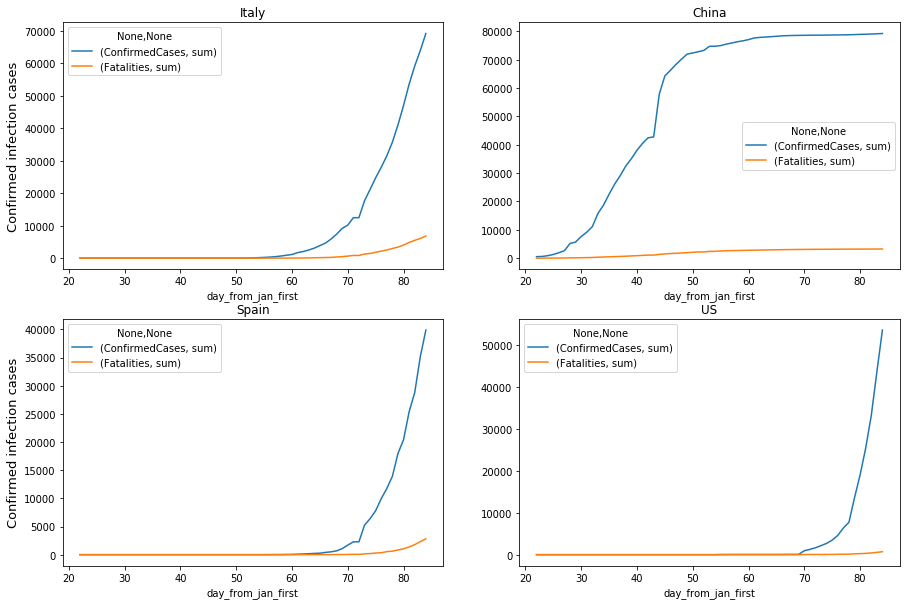

In [16]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
total_date_Italy.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 2)
total_date_China.plot(ax=plt.gca(), title='China')

plt.subplot(2, 2, 3)
total_date_Spain.plot(ax=plt.gca(), title='Spain')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 4)
total_date_US.plot(ax=plt.gca(), title='US')



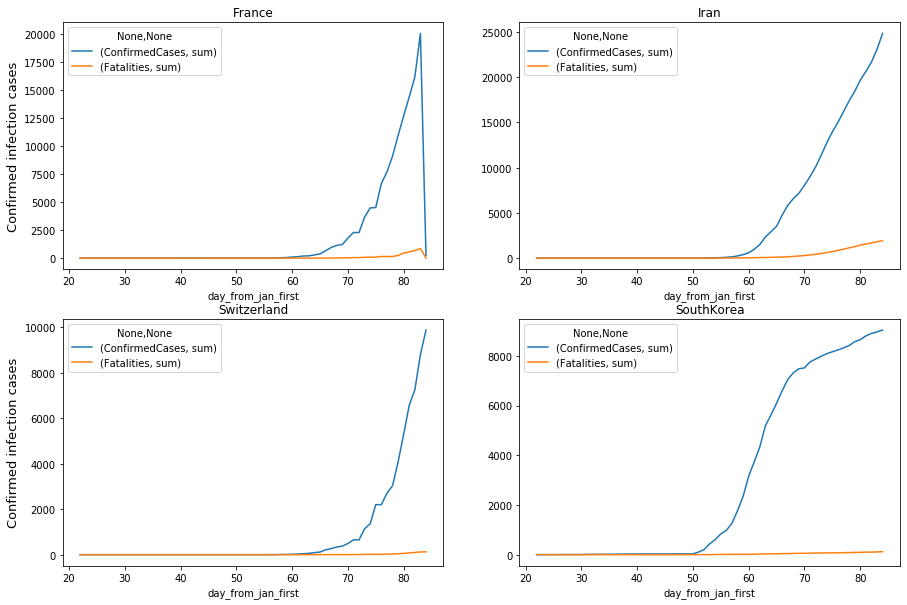

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_France.plot(ax=plt.gca(), title='France')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 2)
total_date_Iran.plot(ax=plt.gca(), title='Iran')

plt.subplot(2, 2, 3)
total_date_Switzerland.plot(ax=plt.gca(), title='Switzerland')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 4)
total_date_SouthKorea.plot(ax=plt.gca(), title='SouthKorea')

Oh this is intersting, France have an immence control of COVID. Lets read about it through internet, and just look at SouthKore,,, ahh amazing this is.

1) We will create graph of first 200 confirmed cases and deaths recorded in Italy, China, Germany, US, Spain, France, Iran, Switzerland, South Korea, and UK, from 1st Jan till 24th march 2020.


2) We will find out temperature effects on COVID-19. After that we will tell about the myth "Seasonal effects on COVID-19". 

In [18]:
#Italy
confirmed_total_date_Italy = data[(data['Country/Region']=='Italy') & data['ConfirmedCases']!=0].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Italy = data[(data['Country/Region']=='Italy') & data['ConfirmedCases']!=0].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)

In [19]:
#China
confirmed_total_date_China = data[(data['Country/Region']=='China') & data['ConfirmedCases']!=0].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_China = data[(data['Country/Region']=='China') & data['ConfirmedCases']!=0].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_China = confirmed_total_date_China.join(fatalities_total_date_China)

In [20]:
#Germany
confirmed_total_date_Germany = data[(data['Country/Region']=='Germany') & data['ConfirmedCases']!=0].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Germany = data[(data['Country/Region']=='Germany') & data['ConfirmedCases']!=0].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Germany = confirmed_total_date_Germany.join(fatalities_total_date_Germany)

In [21]:
#US
confirmed_total_date_USA = data[(data['Country/Region']=='US') & (data['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_USA = data[(data['Country/Region']=='US') & (data['ConfirmedCases']!=0)].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_USA = confirmed_total_date_USA.join(fatalities_total_date_USA)

In [22]:
#Spain
confirmed_total_date_Spain = data[(data['Country/Region']=='Spain') & (data['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Spain = data[(data['Country/Region']=='Spain') & (data['ConfirmedCases']!=0)].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(fatalities_total_date_Spain)

In [23]:
#France
confirmed_total_date_France = data[(data['Country/Region']=='France') & (data['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_France = data[(data['Country/Region']=='France') & (data['ConfirmedCases']!=0)].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_France = confirmed_total_date_France.join(fatalities_total_date_France)

In [24]:
#Iran
confirmed_total_date_Iran = data[(data['Country/Region']=='Iran') & (data['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Iran = data[(data['Country/Region']=='Iran') & (data['ConfirmedCases']!=0)].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Iran = confirmed_total_date_Iran.join(fatalities_total_date_Iran)

In [25]:
#Switzerland
confirmed_total_date_Switzerland = data[(data['Country/Region']=='Switzerland') & (data['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Switzerland = data[(data['Country/Region']=='Switzerland') & (data['ConfirmedCases']!=0)].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Switzerland = confirmed_total_date_Switzerland.join(fatalities_total_date_Switzerland)

In [26]:
#SouthKorea
confirmed_total_date_SouthKorea = data[(data['Country/Region']=='Korea, South') & (data['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_SouthKorea = data[(data['Country/Region']=='Korea, South') & (data['ConfirmedCases']!=0)].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_SouthKorea = confirmed_total_date_SouthKorea.join(fatalities_total_date_SouthKorea)

In [27]:
#UK
confirmed_total_date_UK = data[(data['Country/Region']=='United Kingdom') & (data['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_UK = data[(data['Country/Region']=='United Kingdom') & (data['ConfirmedCases']!=0)].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_UK = confirmed_total_date_UK.join(fatalities_total_date_UK)

In [28]:
#Pakistan
confirmed_total_date_Pak = data[(data['Country/Region']=='Pakistan') & (data['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Pak = data[(data['Country/Region']=='Pakistan') & (data['ConfirmedCases']!=0)].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Pak = confirmed_total_date_Pak.join(fatalities_total_date_Pak)

In [29]:
italy = [i for i in total_date_Italy.ConfirmedCases['sum'].values]
italy_60 = italy[0:60] 
#China
china = [i for i in total_date_China.ConfirmedCases['sum'].values]
china_60 = china[0:60]
#Germany
germany = [i for i in total_date_Germany.ConfirmedCases['sum'].values]
germany_60 = germany[0:60]
#US
usa = [i for i in total_date_USA.ConfirmedCases['sum'].values]
usa_60 = usa[0:60]
#Spain
spain = [i for i in total_date_Spain.ConfirmedCases['sum'].values]
spain_60 = spain[0:60] 
#France
france = [i for i in total_date_France.ConfirmedCases['sum'].values]
france_60 = france[0:60]
#Iran
iran = [i for i in total_date_Iran.ConfirmedCases['sum'].values]
iran_60 = iran[0:60]
#Swiss
swiss = [i for i in total_date_Switzerland.ConfirmedCases['sum'].values]
swiss_60 = swiss[0:60]
#SouthKorea
southKorea = [i for i in total_date_SouthKorea.ConfirmedCases['sum'].values]
southKorea_60 = southKorea[0:60]
#UK
uk = [i for i in total_date_UK.ConfirmedCases['sum'].values]
uk_60= uk[0:60]
#Pakistan
pak = [i for i in total_date_Pak.ConfirmedCases['sum'].values]
pak_60 = pak[0:60]

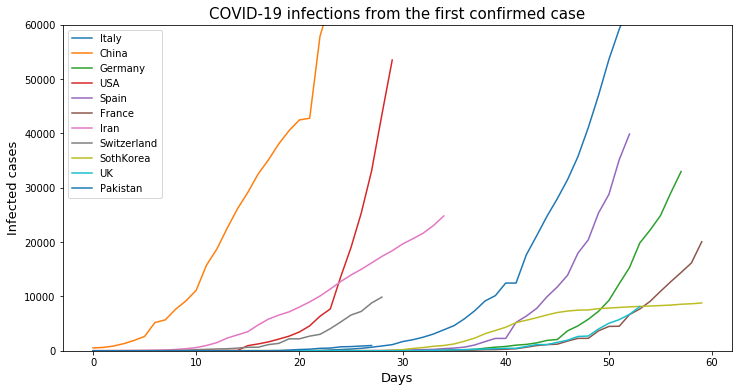

In [30]:
# Plots
plt.figure(figsize=(12,6))

plt.plot(italy_60)
plt.plot(china_60)
plt.plot(germany_60)
plt.plot(usa_60)
plt.plot(spain_60)
plt.plot(france_60)
plt.plot(iran_60)
plt.plot(swiss_60)
plt.plot(southKorea_60)
plt.plot(uk_60)
plt.plot(pak_60)


plt.legend(["Italy", "China","Germany", "USA","Spain","France","Iran","Switzerland","SothKorea","UK","Pakistan"], loc='upper left')
plt.title("COVID-19 infections from the first confirmed case", size=15)
plt.xlabel("Days", size=13)
plt.ylabel("Infected cases", size=13)
plt.ylim(0, 60000)
plt.show()

This is the graph havihg visuals of each country's COVID infection rate from 1st patient to 60 days.

In [31]:
pak = [i for i in total_date_Pak.ConfirmedCases['sum'].values]
pak = pak[0:80]
print(pak)

[2.0, 2.0, 2.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 16.0, 19.0, 20.0, 28.0, 31.0, 53.0, 136.0, 236.0, 299.0, 454.0, 501.0, 730.0, 776.0, 875.0, 972.0]


Pakistan till 24th march had 972 corona patients.

Now lets check it out about:
Did seasons affect COVID-2019 ???? 

We have temperature data in farenheight, of each country. Lets explore this. 

In [32]:
data_temp = pd.read_csv('temperature_dataframe.csv')

In [33]:
data_temp.rename(columns={'country': 'Country/Region','date':'Date','cases':'ConfirmedCases','fatalities':'Fatalities','tempC':'temp'}, inplace=True)

In [34]:
data_temp.head()

,Unnamed: 0,id,province,Country/Region,lat,long,Date,ConfirmedCases,Fatalities,capital,humidity,sunHour,temp,windspeedKmph
0,0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,Kabul,65.0,8.7,-1.0,8.0
1,1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,Kabul,59.0,8.7,-3.0,8.0
2,2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,Kabul,71.0,7.1,0.0,7.0
3,3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,Kabul,79.0,8.7,0.0,7.0
4,4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,Kabul,64.0,8.7,-1.0,8.0


In [35]:
#Italy
#confirmed_total_date_Italy = data_temp[(data_temp['Country/Region']=='Italy') & data_temp['ConfirmedCases']!=0].groupby(['Date']).agg({'ConfirmedCases':['sum']})
temp_total_date_Italy = data_temp[(data_temp['Country/Region']=='Italy') & data_temp['ConfirmedCases']!=0].groupby(['Date']).agg({'temp':['sum']})
#total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)

In [36]:
#China
#confirmed_total_date_China = data[(data['Country/Region']=='China') & data['ConfirmedCases']!=0].groupby(['Date']).agg({'ConfirmedCases':['sum']})
temp_total_date_China = data_temp[(data_temp['Country/Region']=='China') & data_temp['ConfirmedCases']!=0].groupby(['Date']).agg({'temp':['sum']})
#total_date_China = confirmed_total_date_China.join(temp_total_date_China)

In [37]:
#Germany
#confirmed_total_date_Germany = data_temp[(data_temp['Country/Region']=='Germany') & data['ConfirmedCases']!=0].groupby(['Date']).agg({'ConfirmedCases':['sum']})
temp_total_date_Germany = data_temp[(data_temp['Country/Region']=='Germany') & data_temp['ConfirmedCases']!=0].groupby(['Date']).agg({'temp':['sum']})
#total_date_Germany = confirmed_total_date_Germany.join(temp_total_date_Germany)

In [38]:
#US
#confirmed_total_date_USA = data[(data['Country/Region']=='USA') & (data['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
temp_total_date_USA = data_temp[(data_temp['Country/Region']=='USA') & (data_temp['ConfirmedCases']!=0)].groupby(['Date']).agg({'temp':['sum']})
#total_date_USA = confirmed_total_date_USA.join(temp_total_date_USA)

In [39]:
#Spain
#confirmed_total_date_Spain = data[(data['Country/Region']=='Spain') & (data['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
temp_total_date_Spain = data_temp[(data_temp['Country/Region']=='Spain') & (data_temp['ConfirmedCases']!=0)].groupby(['Date']).agg({'temp':['sum']})
#total_date_Spain = confirmed_total_date_Spain.join(temp_total_date_Spain)

In [40]:
#France
#confirmed_total_date_France = data[(data['Country/Region']=='France') & (data['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
temp_total_date_France = data_temp[(data_temp['Country/Region']=='France') & (data_temp['ConfirmedCases']!=0)].groupby(['Date']).agg({'temp':['sum']})
#total_date_France = confirmed_total_date_France.join(temp_total_date_France)

In [41]:
#Iran
#confirmed_total_date_Iran = data[(data['Country/Region']=='Iran') & (data['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
temp_total_date_Iran = data_temp[(data_temp['Country/Region']=='Iran') & (data_temp['ConfirmedCases']!=0)].groupby(['Date']).agg({'temp':['sum']})
#total_date_Iran = confirmed_total_date_Iran.join(temp_total_date_Iran)

In [42]:
#Switzerland
#confirmed_total_date_Switzerland = data[(data['Country/Region']=='Switzerland') & (data['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
temp_total_date_Switzerland = data_temp[(data_temp['Country/Region']=='Switzerland') & (data_temp['ConfirmedCases']!=0)].groupby(['Date']).agg({'temp':['sum']})
#total_date_Switzerland = confirmed_total_date_Switzerland.join(temp_total_date_Switzerland)

In [43]:
#SouthKorea
#confirmed_total_date_SouthKorea = data[(data['Country/Region']=='Korea') & (data['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
temp_total_date_SouthKorea = data_temp[(data_temp['Country/Region']=='Korea') & (data_temp['ConfirmedCases']!=0)].groupby(['Date']).agg({'temp':['sum']})
#total_date_SouthKorea = confirmed_total_date_SouthKorea.join(temp_total_date_SouthKorea)

In [44]:
#UK
#confirmed_total_date_UK = data[(data['Country/Region']=='UK') & (data['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
temp_total_date_UK = data_temp[(data_temp['Country/Region']=='UK') & (data_temp['ConfirmedCases']!=0)].groupby(['Date']).agg({'temp':['sum']})
#total_date_UK = confirmed_total_date_UK.join(temp_total_date_UK)

In [45]:
#Pakistan
#confirmed_total_date_Pak = data[(data['Country/Region']=='Pakistan') & (data['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
temp_total_date_Pak = data_temp[(data_temp['Country/Region']=='Pakistan') & (data_temp['ConfirmedCases']!=0)].groupby(['Date']).agg({'temp':['sum']})
#total_date_Pak = confirmed_total_date_Pak.join(temp_total_date_Pak)

These temperatures recorded in celsius and they are from authentic soruce, Mosltly country's capital temperature are being under consideration only.

In [46]:
#Italy
chk = [i for i in temp_total_date_Italy.values]
Avg_chk = np.round(sum(chk)/len(chk))
str = "AVG Temperature from 1st case of COVID in (Italy) was {} °C (till 22nd March 2020)"
print (str.format(Avg_chk)) 

Temperature from 1st case of COVID in (Italy) was [16.] °C (till 22nd March 2020)


In [47]:
#China Avg is between 7 - 11
China_Avg = 7
str = "AVG Temperature from 1st case of COVID in (China) was {} °C (till 22nd March 2020)"
print (str.format(China_Avg)) 

Temperature from 1st case of COVID in (China) was 7 °C (till 22nd March 2020)


In [48]:
#Germany
chk = [i for i in temp_total_date_Germany.values]
Avg_chk = np.round(sum(chk)/len(chk))
str = "AVG Temperature from 1st case of COVID in (Germany) was {} °C (till 22nd March 2020)"
print (str.format(Avg_chk)) 

Temperature from 1st case of COVID in (Germany) was [9.] °C (till 22nd March 2020)


In [49]:
#USA iavg is b/w 7 to 11
USA_Avg = 7 
str = "AVG Temperature from 1st case of COVID in (USA) was {} °C (till 22nd March 2020)"
print (str.format(USA_Avg)) 

Temperature from 1st case of COVID in (USA) was 7 °C (till 22nd March 2020)


In [50]:
#Spain
chk = [i for i in temp_total_date_Spain.values]
Avg_chk = np.round(sum(chk)/len(chk))
str = "AVG Temperature from 1st case of COVID in (Spain) was {} °C (till 22nd March 2020)"
print (str.format(Avg_chk)) 

Temperature from 1st case of COVID in (Spain) was [17.] °C (till 22nd March 2020)


In [51]:
#Iran
chk = [i for i in temp_total_date_Iran.values]
Avg_chk = np.round(sum(chk)/len(chk))
str = "AVG Temperature from 1st case of COVID in (Iran) was {} °C (till 22nd March 2020)"
print (str.format(Avg_chk))

Temperature from 1st case of COVID in (Iran) was [16.] °C (till 22nd March 2020)


In [52]:
#Swiss
chk = [i for i in temp_total_date_Switzerland.values]
Avg_chk = np.round(sum(chk)/len(chk))
str = "AVG Temperature from 1st case of COVID in (Switzerland) was {} °C (till 22nd March 2020)"
print (str.format(Avg_chk))


Temperature from 1st case of COVID in (Switzerland) was [10.] °C (till 22nd March 2020)


In [53]:
#Korea
chk = [i for i in temp_total_date_SouthKorea.values]
Avg_chk = np.round(sum(chk)/len(chk))
str = "AVG Temperature from 1st case of COVID in (Korea) was {} °C (till 22nd March 2020)"
print (str.format(Avg_chk))

Temperature from 1st case of COVID in (Korea) was [6.] °C (till 22nd March 2020)


In [54]:
#UK
Avg_chk = 13

In [55]:
#Pakistan
chk = [i for i in temp_total_date_Pak.values]
Avg_chk = np.round(sum(chk)/len(chk))
str = "AVG Temperature from 1st case of COVID in (Pakistan) was {} °C (till 22nd March 2020)"
print (str.format(Avg_chk))

Temperature from 1st case of COVID in (Pakistan) was [22.] °C (till 22nd March 2020)


Final Observations::

We can see that the most effected countries have variety of seasons going in there countries. CoVid-19 has nothing to do with seasons. Stay Safe !!!